In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats
import math

In [4]:
initial = pd.read_csv('C:/users/rustym/documents/github/patchseq_gdoc_analysis/patch_seq_log_mouse.csv')

In [5]:
ps = initial[['Date', 'Morph', 'Post patch?', 'Post patch pipette R', 'SM_QC_PF', 'Bad dates']]
ps['Date'] = pd.to_datetime(ps['Date'], format = '%y%m%d')
ps['Morph'] = ps['Morph'].astype('category')
#ps['Bad dates'] = ps['Bad dates'].astype('category')
#ps['PCR cycles'] = ps['PCR cycles'].astype('category')
ps['Post patch?'] = ps['Post patch?'].astype('category')
ps['SM_QC_PF'] = ps['SM_QC_PF'].astype('category')
ps['Bad dates'] = ps['Bad dates'].astype('category')
#ps = ps[ps['PCR cycles'] == 21]
ps = ps[ps['Bad dates'] != 'x']
ps = ps[ps['SM_QC_PF'] != 'cnt']
ps = ps[(ps['Morph'] == 'y') | (ps['Morph'] == 'n') | (ps['Morph'] == 'q')]
ps.dropna(subset=['Morph', 'Post patch?'], inplace=True)
ps

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Date,Morph,Post patch?,Post patch pipette R,SM_QC_PF,Bad dates
251,2016-03-18,n,nr,NaN,fail,NaN
252,2016-03-18,n,nr,NaN,fail,NaN
253,2016-03-18,y,nr,NaN,fail,NaN
254,2016-03-18,y,Outside-Out,NaN,pass,NaN
255,2016-03-18,n,nr,NaN,fail,NaN
256,2016-03-18,n,nr,NaN,fail,NaN
257,2016-03-18,y,nr,NaN,pass,NaN
258,2016-03-18,n,nr,NaN,pass,NaN
259,2016-03-18,n,nr,NaN,fail,NaN
265,2016-04-06,n,nr,NaN,fail,NaN


In [6]:
ps = ps.drop('Bad dates', 1)
ps = ps.drop('SM_QC_PF', 1)
ps.head()

,Date,Morph,Post patch?,Post patch pipette R
251,2016-03-18,n,nr,NaN
252,2016-03-18,n,nr,NaN
253,2016-03-18,y,nr,NaN
254,2016-03-18,y,Outside-Out,NaN
255,2016-03-18,n,nr,NaN


In [88]:
#ps['Post patch?'].value_counts()

In [8]:
def nucleated(x):
    nucleus = x[(x["Post patch?"] == "Nucleated") | (((x["Post patch?"] == "nucleus_visible") | (x["Post patch?"] == "nucleus_present")) & (x["Post patch pipette R"] >= 500))]
    return nucleus

def partial_nucleated(y):
    partial = y[(y["Post patch?"] == 'Partial-Nucleus') | (((y['Post patch?'] == 'nucleus_present') | (y['Post patch?'] == 'nucleus_visible')) & (y["Post patch pipette R"] <= 499))]
    return partial

def outside_out(z):
    outside = z[(z["Post patch?"] == 'Outside-Out') | (((z['Post patch?'] == 'nucleus_absent') | (z['Post patch?'] == 'no_nuclues_visible')) & (z['Post patch pipette R'] >= 500))]
    return outside

def no_seal(w): 
    no = w[(w["Post patch?"] == 'No-Seal') | (((w['Post patch?'] == 'nucleus_absent') | (w['Post patch?'] == 'no_nucleus_visible')) & (w['Post patch pipette R'] <= 499))]
    return no
    
def entire_cell(v):
    entire = v[(v["Post patch?"] == 'Entire-Cell') | (v['Post patch?'] == 'entire_cell')]
    return entire

In [9]:
nuc = nucleated(ps)
nuc["post patch class"] = "a.Nucleated"
part_nuc = partial_nucleated(ps)
part_nuc["post patch class"] = "b.Partial nucleated"
out_out = outside_out(ps)
out_out["post patch class"] = "c.Outside out"
noSeal = no_seal(ps)
noSeal["post patch class"] = "d.No seal"
entirecell = entire_cell(ps)
entirecell['post patch class'] = "e.Entire cell"

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [10]:
frames = [nuc, part_nuc, out_out, noSeal, entirecell]
ps = pd.concat(frames)
ps.head()

,Date,Morph,Post patch?,Post patch pipette R,post patch class
268,2016-04-06,y,Nucleated,NaN,a.Nucleated
280,2016-04-07,n,Nucleated,NaN,a.Nucleated
294,2016-04-08,n,Nucleated,NaN,a.Nucleated
303,2016-04-11,y,Nucleated,NaN,a.Nucleated
320,2016-04-12,y,Nucleated,NaN,a.Nucleated


In [11]:
ps = ps.drop('Post patch?', 1)
ps = ps.drop('Post patch pipette R', 1)
ps = ps.drop('Date', 1)
ps.head()

,Morph,post patch class
268,y,a.Nucleated
280,n,a.Nucleated
294,n,a.Nucleated
303,y,a.Nucleated
320,y,a.Nucleated


In [12]:
y = ps[ps['Morph'] == 'y']
y["morpho_call"] = "y"
n = ps[ps['Morph'] == 'n']
n['morpho_call'] = 'n'
q = ps[ps['Morph'] == 'q']
q['morpho_call'] = 'q'
frames = [y, n, q]
morphpp = pd.concat(frames)
#morphpp = morphpp.drop('Date', 1)
morphpp = morphpp.groupby(['morpho_call', 'post patch class']).count()
morphpp = morphpp.reset_index()
morphpp = morphpp.pivot_table(index = ['post patch class'], columns = 'morpho_call', values = ['Morph'], aggfunc = 'sum')
morphpp
#ps['Morph'].value_counts()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

Morph          
morpho_call             n    q    y
post patch class                   
a.Nucleated           412  215  424
b.Partial nucleated   291   41   89
c.Outside out         363   92  432
d.No seal             809   43  113
e.Entire cell          21    5    7

In [13]:
morph_pcts = morphpp.div(morphpp.sum(1), axis = 0)*100
morph_pcts

Morph                      
morpho_call                  n          q          y
post patch class                                    
a.Nucleated          39.200761  20.456708  40.342531
b.Partial nucleated  69.121140   9.738717  21.140143
c.Outside out        40.924464  10.372041  48.703495
d.No seal            83.834197   4.455959  11.709845
e.Entire cell        63.636364  15.151515  21.212121

In [14]:
#nucs = list(morph_pcts['Morph', 'Nucleated'])
#part_nucs = list(morph_pcts['Morph', 'Partial nucleated'])
#out_outs = list(morph_pcts['Morph', 'Outside out'])
#no_seal = list(morph_pcts['Morph', 'No seal'])
#entire = list(morph_pcts['Morph', 'Entire cell'])
y = list(morph_pcts['Morph', 'y'])
q = list(morph_pcts['Morph', 'q'])
n = list(morph_pcts['Morph', 'n'])
y

[40.342530922930543,
 21.140142517814727,
 48.703494926719273,
 11.709844559585491,
 21.212121212121211]

In [15]:
totals = list(morphpp.sum(1))
totals

[1051, 421, 887, 965, 33]

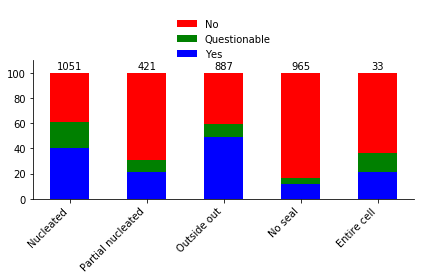

In [33]:
index = np.arange(len(totals))
barWidth = 0.5
fig,ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds(0,110)
post_patch = ['Nucleated', 'Partial nucleated', 'Outside out', 'No seal', 'Entire cell']
plt.xticks(index, post_patch, rotation = 45, size = 10, ha = 'right')
axes = plt.gca()
axes.set_ylim([0,150])
plt.yticks([0,20,40,60,80,100])

yes = plt.bar(index, y, color = 'blue', width = barWidth)
quest = plt.bar(index, q, color = 'green', bottom = y, width = barWidth)
no = plt.bar(index, n, color = 'red', bottom = [i+j for i,j in zip(y, q)], width = barWidth)
for bar, total in zip(no, totals):
    ax.text(bar.get_x()+bar.get_width()/2, 101, total, ha = 'center', va = 'bottom', fontsize=10)
leg = plt.legend((no,quest,yes), ('No', 'Questionable', 'Yes'), loc = 'upper center', frameon=False)
plt.t
plt.tight_layout()
plt.show()
fig.savefig('morpho_calls_by_postpatch_outcome')

In [69]:
#yes = y.groupby(['morpho_call', 'post patch class']).count()
#yes = yes.reset_index()
#yes = yes.pivot_table(values = 'Morph', index = 'morpho_call', columns = 'post patch class', aggfunc = 'sum')
#yes